#### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Read the dataset

In [3]:
df = pd.read_csv('google_review_ratings.csv')
df.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [4]:
df.columns = ['User', 'churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums', 'malls',
              'zoo', 'restaurants', 'pubs_bars', 'local_services', 'burger_pizza_shops', 
              'hotels_other_lodgings', 'juice_bars', 'art_galleries', 'dance_clubs',
              'swimming_pools', 'gyms', 'bakeries', 'beauty_spas', 'cafes', 'view_points',
              'monuments', 'gardens','Unnamed: 25']
df.head(2)

,User,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [5]:
df.shape

(5456, 26)

#### Data Preprocessing

#### 1) Handle Null Values

In [6]:
df.isnull().sum()

User                        0
churches                    0
resorts                     0
beaches                     0
parks                       0
theatres                    0
museums                     0
malls                       0
zoo                         0
restaurants                 0
pubs_bars                   0
local_services              0
burger_pizza_shops          1
hotels_other_lodgings       0
juice_bars                  0
art_galleries               0
dance_clubs                 0
swimming_pools              0
gyms                        0
bakeries                    0
beauty_spas                 0
cafes                       0
view_points                 0
monuments                   0
gardens                     1
Unnamed: 25              5454
dtype: int64

In [7]:
df1 = df.copy()

In [8]:
df.drop('Unnamed: 25',axis=1,inplace=True)
df.shape

(5456, 25)

In [9]:
df.dropna(inplace=True)
df.shape

(5454, 25)

In [10]:
nv = df.isnull().sum()
nv = nv[nv>0]
nv

Series([], dtype: int64)

#### Handling Duplicates

In [11]:
df.duplicated().sum()

0

#### 3) Check data types

In [12]:
df.dtypes

User                      object
churches                 float64
resorts                  float64
beaches                  float64
parks                    float64
theatres                 float64
museums                  float64
malls                    float64
zoo                      float64
restaurants              float64
pubs_bars                float64
local_services            object
burger_pizza_shops       float64
hotels_other_lodgings    float64
juice_bars               float64
art_galleries            float64
dance_clubs              float64
swimming_pools           float64
gyms                     float64
bakeries                 float64
beauty_spas              float64
cafes                    float64
view_points              float64
monuments                float64
gardens                  float64
dtype: object

In [16]:
df['local_services'] = pd.to_numeric(df['local_services'])

In [17]:
df.dtypes.value_counts()

float64    24
object      1
dtype: int64

In [18]:
df.head()

,User,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [20]:
df.describe(percentiles=[0.01,0.02,0.03,0.04,0.05]).T

,count,mean,std,min,1%,2%,3%,4%,5%,50%,max
churches,5454.0,1.455746,0.827732,0.00,0.00,0.00,0.00,0.5100,0.5500,1.34,5.0
resorts,5454.0,2.320048,1.421576,0.00,0.00,0.51,0.55,0.6000,0.6400,1.91,5.0
beaches,5454.0,2.489059,1.247503,0.00,0.86,1.18,1.26,1.2800,1.3100,2.06,5.0
parks,5454.0,2.797103,1.309188,0.83,1.26,1.32,1.33,1.3500,1.3600,2.46,5.0
theatres,5454.0,2.958904,1.338785,1.12,1.26,1.33,1.34,1.3700,1.3900,2.67,5.0
museums,5454.0,2.893423,1.282101,1.11,1.25,1.29,1.32,1.3500,1.3700,2.68,5.0
malls,5454.0,3.351476,1.413291,1.12,1.23,1.28,1.30,1.3200,1.3600,3.23,5.0
zoo,5454.0,2.541177,1.111398,0.86,0.97,1.11,1.18,1.2500,1.2800,2.17,5.0
restaurants,5454.0,3.126542,1.356774,0.84,1.19,1.25,1.30,1.3212,1.3500,2.80,5.0
pubs_bars,5454.0,2.832695,1.307299,0.81,0.87,0.95,1.02,1.1200,1.1900,2.68,5.0


In [21]:
df[df['restaurants']<1.19].shape

(50, 25)

In [22]:
df.describe(percentiles=[0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,50%,95%,96%,97%,98%,99%,max
churches,5454.0,1.455746,0.827732,0.00,1.34,2.6400,2.6900,3.66,4.4394,5.0,5.0
resorts,5454.0,2.320048,1.421576,0.00,1.91,5.0000,5.0000,5.00,5.0000,5.0,5.0
beaches,5454.0,2.489059,1.247503,0.00,2.06,5.0000,5.0000,5.00,5.0000,5.0,5.0
parks,5454.0,2.797103,1.309188,0.83,2.46,5.0000,5.0000,5.00,5.0000,5.0,5.0
theatres,5454.0,2.958904,1.338785,1.12,2.67,5.0000,5.0000,5.00,5.0000,5.0,5.0
museums,5454.0,2.893423,1.282101,1.11,2.68,5.0000,5.0000,5.00,5.0000,5.0,5.0
malls,5454.0,3.351476,1.413291,1.12,3.23,5.0000,5.0000,5.00,5.0000,5.0,5.0
zoo,5454.0,2.541177,1.111398,0.86,2.17,5.0000,5.0000,5.00,5.0000,5.0,5.0
restaurants,5454.0,3.126542,1.356774,0.84,2.80,5.0000,5.0000,5.00,5.0000,5.0,5.0
pubs_bars,5454.0,2.832695,1.307299,0.81,2.68,5.0000,5.0000,5.00,5.0000,5.0,5.0


#### Generate Dendrograms

In [24]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [25]:
import time

In [26]:
st = time.time()
print(st)

1689158280.461951


In [ ]:
st = time.time()
plt.figure(figsize=(25,6))
dendrogram(linkage(df.iloc[:,1:],method='ward'))
plt.title('Ward Linkage')
plt.xlabel('Data points index')
plt.ylabel('Distance')
plt.grid()
plt.show()
et = time.time()
print('Time elapsed',et-st)

#### Standardization

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
sc = StandardScaler()

df_sc = sc.fit_transform(df.iloc[:,1:])
print(df_sc.shape)

(5454, 24)


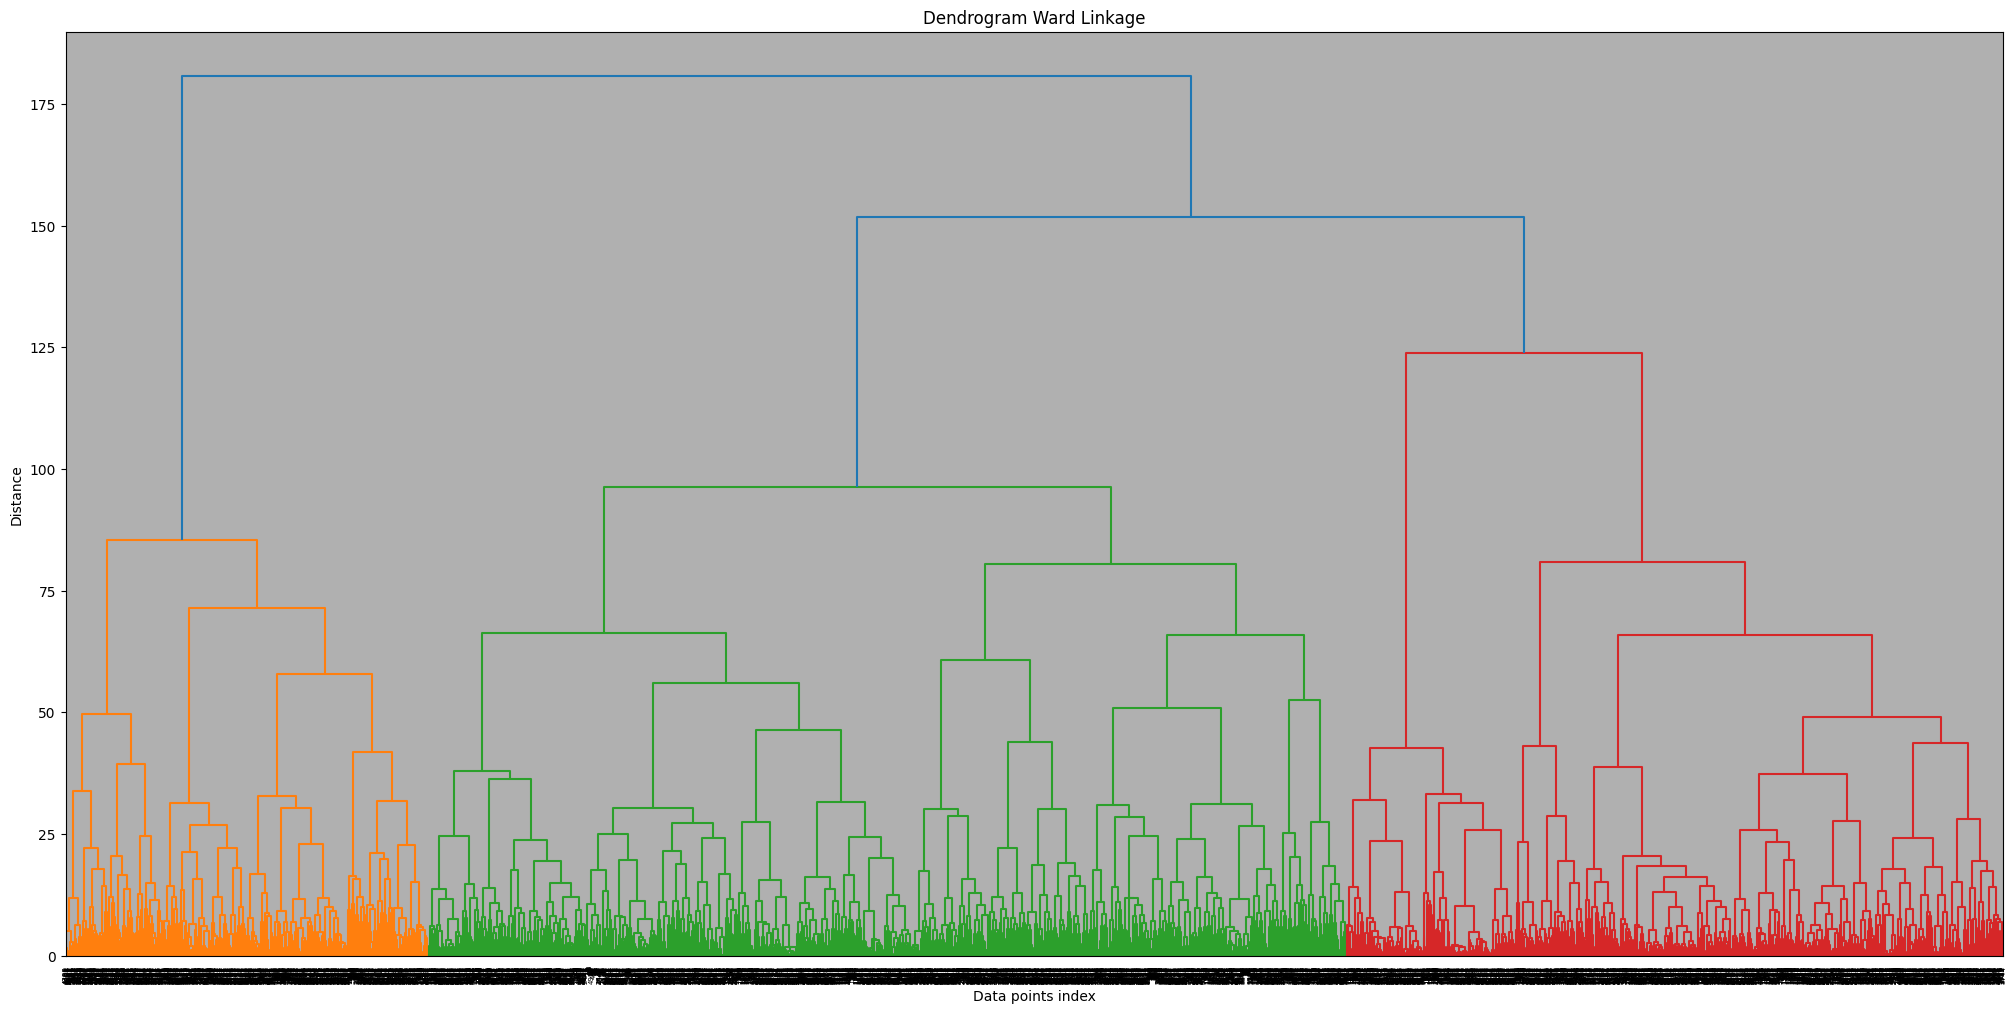

Diff 217.34658241271973


In [30]:
st = time.time()
plt.figure(figsize=(25,12))
dendrogram(linkage(df_sc,method='ward'))
plt.title('Dendrogram Ward Linkage')
plt.xlabel('Data points index')
plt.ylabel('Distance')
plt.grid()
plt.show()
et = time.time()
print('Diff',et-st)

#### Elbow Method

In [31]:
from sklearn.cluster import KMeans

In [32]:
wcss = []
for i in range(1,15): # i = no of clusters,
    m = KMeans(n_clusters=i,random_state=0)
    m.fit(df_sc)
    wcss.append(m.inertia_)

print('WCSS\n',wcss)

WCSS
 [130896.0, 112228.10288656972, 99733.61769636461, 92053.5006246242, 87470.83907089203, 83240.25758611406, 79702.07640660643, 76776.1928896793, 74336.75090216803, 71975.28791420645, 69909.67060685341, 68100.17410482385, 66621.46160472879, 64832.84707415685]


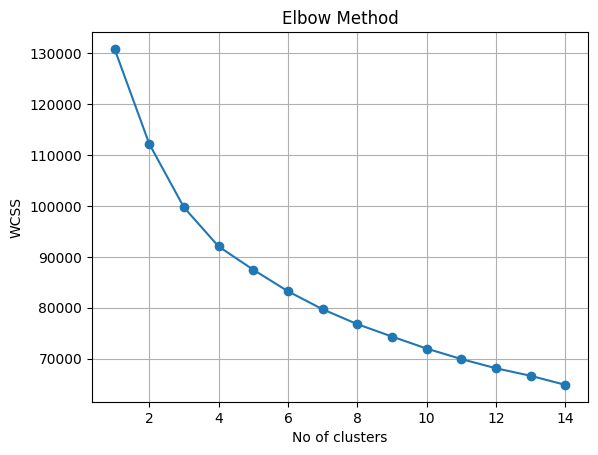

In [33]:
plt.plot(list(range(1,15)),wcss,marker='o')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.grid()
plt.show()

#### Silhouette Score

In [36]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [38]:
for i in range(2,10):
    model = KMeans(n_clusters=i,random_state=0).fit(df_sc)  
    #AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='ward').fit(df_sc)
    print(f'Silhoutte Score at K={i}',silhouette_score(df_sc,model.labels_))

Silhoutte Score at K=2 0.1532851503237471
Silhoutte Score at K=3 0.1454621942516736
Silhoutte Score at K=4 0.14440205327723607
Silhoutte Score at K=5 0.15071065201082687
Silhoutte Score at K=6 0.13804917253305482
Silhoutte Score at K=7 0.14431060588099356
Silhoutte Score at K=8 0.14625635575397605
Silhoutte Score at K=9 0.14485659496337303


#### Agglomerative Clustering (with K=5)

In [42]:
# df.iloc[:,1:] => df_sc
df1 = df.iloc[:,1:].copy()
df2 = df.iloc[:,1:].copy()
df3 = df.iloc[:,1:].copy()

In [40]:
agg_model5 = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
ypred5 = agg_model5.fit_predict(df_sc)
print(ypred5)

[4 4 4 ... 1 1 1]


In [47]:
from collections import Counter
import seaborn as sns

Counter({2: 1371, 4: 1355, 1: 1229, 0: 1023, 3: 476})


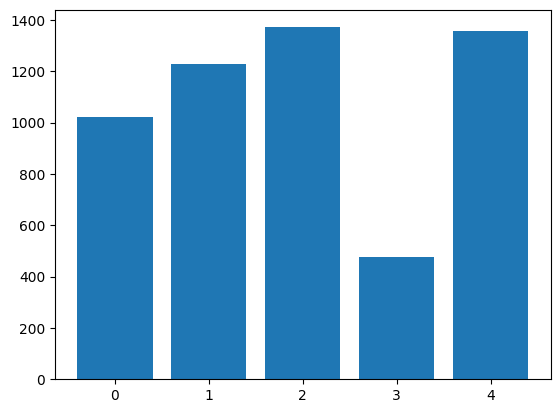

In [50]:
ypred_count = Counter(ypred5)
print(ypred_count)
plt.bar(ypred_count.keys(),ypred_count.values())
plt.show()

In [51]:
def K_cluster_analysis(k,table):
    model = AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
    ypred = model.fit_predict(table)
    print(Counter(ypred))
    table[f'Cls{k}'] = ypred
    r1 = table.drop(f'Cls{k}',axis=1).mean().reset_index().T
    r1.columns = r1.loc['index']
    r1 = r1.iloc[1:,]
    r1.index = ['Mean']
    r2 = table.groupby(f'Cls{k}').mean()
    cls_analysis = pd.concat([r1,r2])
    return cls_analysis

In [53]:
cls4 = K_cluster_analysis(4,df1)
cls4.T

Counter({0: 2086, 1: 1792, 2: 1090, 3: 486})


,Mean,0,1,2,3
churches,1.455746,1.440796,1.203253,2.263661,0.63893
resorts,2.320048,2.431477,2.272712,2.815248,0.905679
beaches,2.489059,2.989401,2.066016,2.635046,1.573951
parks,2.797103,3.777234,2.252176,2.370761,1.555679
theatres,2.958904,4.156477,2.448945,2.127073,1.564671
museums,2.893423,3.651016,2.931936,1.958651,1.596193
malls,3.351476,3.501035,4.09067,2.042596,2.919506
zoo,2.541177,2.486232,3.338158,1.599835,1.949588
restaurants,3.126542,2.847133,4.264587,1.953835,2.759712
pubs_bars,2.832695,2.57813,3.873326,1.551642,2.96142


In [54]:
df1.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Cls4
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0


In [57]:
users_in_seg0  = df1[df1['Cls4']==0]
users_in_seg1  = df1[df1['Cls4']==1]
users_in_seg2  = df1[df1['Cls4']==2]
users_in_seg3  = df1[df1['Cls4']==3]


In [58]:
users_in_seg0.describe()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Cls4
count,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,...,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.0
mean,1.440796,2.431477,2.989401,3.777234,4.156477,3.651016,3.501035,2.486232,2.847133,2.578130,...,1.050743,0.743667,0.560058,0.579243,0.694660,0.854415,2.221611,1.863754,1.724348,0.0
std,0.621908,1.367092,1.402298,1.250313,1.038801,1.169031,1.303195,0.947940,1.211778,1.105133,...,0.758420,0.506213,0.373608,0.438210,0.730672,0.851735,1.890385,1.651711,1.308348,0.0
min,0.000000,0.000000,0.520000,0.830000,1.280000,1.540000,1.520000,0.900000,0.860000,0.830000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.070000,1.340000,1.830000,2.630000,3.140000,2.840000,2.360000,1.720000,1.770000,1.660000,...,0.690000,0.540000,0.500000,0.510000,0.530000,0.560000,0.770000,0.840000,1.040000,0.0
50%,1.320000,2.160000,2.580000,4.160000,4.980000,3.260000,3.240000,2.600000,2.670000,2.590000,...,0.830000,0.740000,0.620000,0.620000,0.650000,0.720000,1.070000,1.090000,1.310000,0.0
75%,1.830000,2.740000,5.000000,5.000000,5.000000,5.000000,5.000000,2.930000,3.360000,2.950000,...,1.150000,0.907500,0.780000,0.770000,0.760000,0.860000,5.000000,1.717500,1.690000,0.0
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.0


In [59]:
df.head()

,User,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [60]:
df1['User_ID'] = df['User']
# df1

#### Agglomerative Clustering for 6 clusters

In [61]:
cls6 = K_cluster_analysis(6,df2)
cls6.T

Counter({1: 1298, 0: 1093, 2: 1090, 4: 993, 5: 494, 3: 486})


,Mean,0,1,2,3,4,5
churches,1.455746,1.630421,1.187658,2.263661,0.63893,1.232075,1.244231
resorts,2.320048,2.251308,2.592196,2.815248,0.905679,2.629789,1.433259
beaches,2.489059,2.843248,2.263482,2.635046,1.573951,3.150272,1.547166
parks,2.797103,4.056414,2.307011,2.370761,1.555679,3.46994,2.108097
theatres,2.958904,4.168518,2.529831,2.127073,1.564671,4.143223,2.236417
museums,2.893423,3.283952,3.152704,1.958651,1.596193,4.055045,2.351862
malls,3.351476,3.060375,4.394191,2.042596,2.919506,3.986073,3.293158
zoo,2.541177,2.462754,3.241071,1.599835,1.949588,2.512075,3.593259
restaurants,3.126542,2.720384,4.205871,1.953835,2.759712,2.986647,4.418866
pubs_bars,2.832695,2.77764,3.681911,1.551642,2.96142,2.35853,4.376275
